In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("/content/heart.csv")

In [5]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [11]:
df.shape

(918, 12)

In [13]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

*encoding of the categorical values*

In [12]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()
df["Sex_e"]=le.fit_transform(df["Sex"])
df["ChestPainType_e"]=le.fit_transform(df["ChestPainType"])
df["RestingECG_e"]=le.fit_transform(df["RestingECG"])
df["ExerciseAngina_e"]=le.fit_transform(df["ExerciseAngina"])
df["ST_Slope_e"]=le.fit_transform(df["ST_Slope"])

In [16]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_e,ChestPainType_e,RestingECG_e,ExerciseAngina_e,ST_Slope_e
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,1,0,2


In [17]:
df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)

In [19]:
corr=df.corr()
print(corr)

                       Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age               1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP         0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol      -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS         0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR            -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak           0.258612   0.164803     0.050148   0.052698 -0.160691   
HeartDisease      0.282039   0.107589    -0.232741   0.267291 -0.400421   
Sex_e             0.055750   0.005133    -0.200092   0.120076 -0.189186   
ChestPainType_e  -0.077150  -0.020647     0.067880  -0.073151  0.289123   
RestingECG_e     -0.007484   0.022656    -0.196544   0.087050 -0.179276   
ExerciseAngina_e  0.215793   0.155101    -0.034166   0.060451 -0.370425   
ST_Slope_e       -0.268264  -0.075162     0.111471  -0.175774  0.343419   

                   Oldpe

<Axes: >

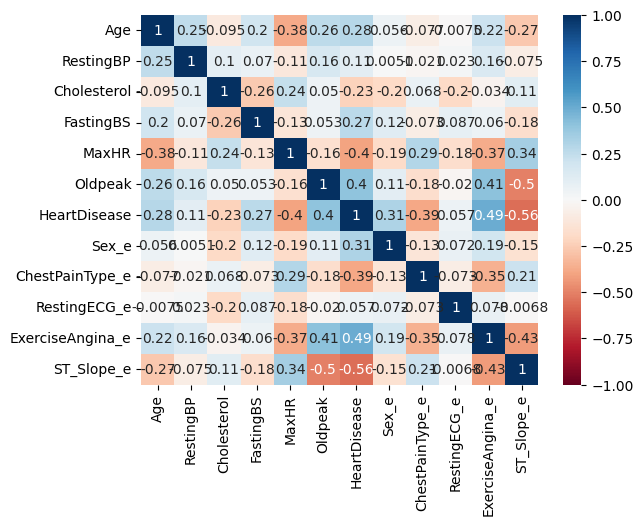

In [20]:
sns.heatmap(corr,annot=True,cmap='RdBu',vmin=-1,vmax=1)

**dropping the column not required**

In [21]:
to_drop = ['RestingBP', 'Cholesterol', 'RestingECG_e', 'ChestPainType_e']
X = df.drop(columns=to_drop + ['HeartDisease'])  # features



In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
y = df['HeartDisease']

In [24]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,recall_score,roc_auc_score,roc_curve,confusion_matrix,confusion_matrix

In [34]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
model.score(X_test,y_test)

0.8097826086956522

In [36]:
y_pred=model.predict(X_test)

In [37]:
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy1:.2f}")

Accuracy: 0.81


In [45]:
y_prob = model.predict_proba(X_test)[:, 1]

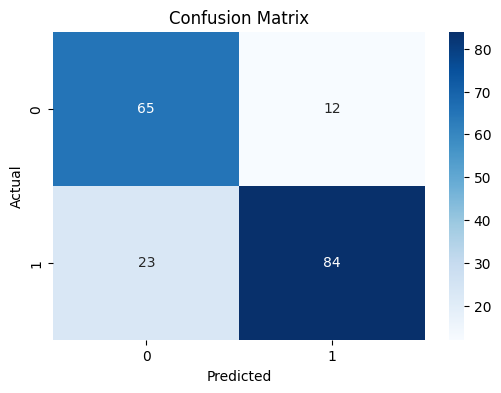

In [47]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.2f}")

AUC Score: 0.88


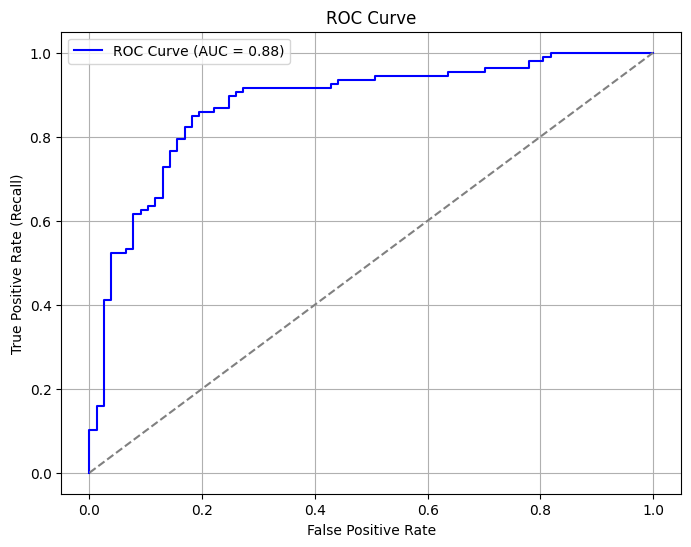

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()